In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapefile as shp
from  shapely.geometry import Point, Polygon
import geopandas as gpd
import metpy
import seaborn as sns

In [60]:
train_weather = pd.read_csv("../output/train_weather.csv", parse_dates=["Date"])


In [61]:
train_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              10506 non-null  int64         
 1   Date                    10506 non-null  datetime64[ns]
 2   Address                 10506 non-null  object        
 3   Species                 10506 non-null  object        
 4   Block                   10506 non-null  int64         
 5   Street                  10506 non-null  object        
 6   Trap                    10506 non-null  object        
 7   AddressNumberAndStreet  10506 non-null  object        
 8   Latitude_x              10506 non-null  float64       
 9   Longitude_x             10506 non-null  float64       
 10  AddressAccuracy         10506 non-null  int64         
 11  NumMosquitos            10506 non-null  int64         
 12  WnvPresent              10506 non-null  int64 

In [62]:
train_weather.drop(columns=["Unnamed: 0"], inplace=True)

In [63]:
train_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Block,10506.0,35.687797,2.433947e+01,10.000000,12.000000,33.000000,52.000000,98.000000
Latitude_x,10506.0,41.841139,1.127415e-01,41.644612,41.732984,41.846283,41.954690,42.017430
Longitude_x,10506.0,-87.699908,9.651417e-02,-87.930995,-87.760070,-87.694991,-87.627796,-87.531635
AddressAccuracy,10506.0,7.819532,1.452921e+00,3.000000,8.000000,8.000000,9.000000,9.000000
NumMosquitos,10506.0,12.853512,1.613382e+01,1.000000,2.000000,5.000000,17.000000,50.000000
WnvPresent,10506.0,0.052446,2.229357e-01,0.000000,0.000000,0.000000,0.000000,1.000000
year,10506.0,2009.576242,2.354645e+00,2007.000000,2007.000000,2009.000000,2011.000000,2013.000000
month,10506.0,7.692557,1.067675e+00,5.000000,7.000000,8.000000,8.000000,10.000000
zip_code,10506.0,60625.462212,8.632335e+01,60018.000000,60617.000000,60633.000000,60646.000000,60827.000000
Stn1-Lat,10506.0,41.995000,3.787373e-12,41.995000,41.995000,41.995000,41.995000,41.995000


<AxesSubplot:xlabel='year', ylabel='count'>

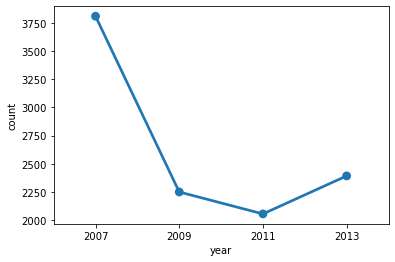

In [64]:
yearly_mosquitos_count = train_weather.groupby("year")["NumMosquitos"].agg(["count"]).reset_index()
sns.pointplot(x="year", y="count", data=yearly_mosquitos_count)

2007 had higher mosquito count and 2013 saw the raise again.

In [65]:
print ( train_weather.Date.dt.year.unique() )

[2007 2009 2011 2013]


In [66]:
train_weather.CodeSum.unique()

array(['BR HZ', 'RA BR', 'TSRA BR HZ VCTS', ' ', 'TSRA RA BR VCTS',
       'TS TSRA RA BR HZ VCTS', 'DZ BR', 'RA BR HZ', 'HZ', 'VCTS',
       'TSRA RA DZ BR HZ', 'TSRA RA', 'TSRA BR HZ', 'TSRA RA BR',
       'TS TSRA RA BR', 'BR', 'TSRA HZ', 'TSRA', 'RA', 'TS TSRA BR',
       'RA DZ BR', 'TS TSRA BR HZ', 'TS TSRA RA VCTS', 'TSRA BR', 'TS BR',
       'TS', 'FG BR HZ', 'TS TSRA RA FG BR HZ'], dtype=object)

This Codesum column would tell us if there was Mist, Light Rain, Normal Rain, Heavy Rain.

In [67]:
def get_codesum_list(lst):
    lst = train_weather.CodeSum.unique().tolist()
    mylst =[]
    for val in lst:
        v = val.split(" ")
        # print (val.split(" "))
        for element in v:
            if element[-1] not in ("+","-"):
                mylst.append([element[i:i+2] for i in range(0, len(element), 2)])

    return mylst


In [68]:
# print (get_codesum_list(train_weather.CodeSum.unique().tolist()))